# <span style=color:blue> Numerical Simulation Laboratory #
## <span style=color:blue> Exercise lecture 8 ##
### Mattia Nasi 11590A ###

The variational principle is a foundational concept in Quantum Mechanics, providing a powerful method for approximating the ground state energy of a quantum system. It states that the expectation value of the Hamiltonian, computed over any normalized trial wave function, is always greater than or equal to the true ground state energy $E_0$:

$$
\langle \hat{H} \rangle_T = 
\frac{\int dx\, \Psi_T^*(x)\, \hat{H} \Psi_T(x)}
{\int dx\, |\Psi_T(x)|^2} \geq E_0 =
\frac{\langle \Psi_0 | \hat{H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

In this laboratory activity, we explore the application of the *Variational Monte Carlo* (VMC) method to numerically approximate the ground state of a single quantum particle in a one-dimensional potential well described by:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This system presents a non-trivial potential landscape and does not admit an analytical solution, making it an ideal candidate for numerical approaches such as VMC. The core idea of the method is to postulate a parametrized trial wave function and then optimize its parameters to minimize the expectation value of the Hamiltonian, thereby approximating the ground state energy as closely as possible.

For this purpose, we adopt the following symmetric, double-peaked Gaussian ansatz for the trial wave function:

$$
\Psi_T^{\sigma,\mu}(x) \propto 
e^{-\frac{(x-\mu)^2}{2\sigma^2}} + 
e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

This trial function depends on two variational parameters, $\sigma$ and $\mu$, which respectively control the width and the displacement of the Gaussian peaks. The optimization of these parameters is carried out using Monte Carlo sampling techniques to minimize the variational energy.

The goal of this work is to implement and analyze the VMC approach for this system, ultimately obtaining a numerical estimate for the ground state energy and discussing the physical significance of the optimized parameters.


## <span style=color:red> 8.1 ##



In the first part of this project, I implemented a Variational Monte Carlo code to study a single quantum particle in one dimension. My approach uses the Metropolis algorithm to sample the square modulus of a chosen trial wave function, $|\Psi_T^{\sigma,\mu}(x)|^2$, using a uniform transition probability $T(x_{\text{new}} | x_{\text{old}})$.

To estimate the ground state energy, I applied the data blocking method to compute the expectation value of the Hamiltonian:

$$
\langle \hat{H} \rangle_T = 
\frac{\int dx\, \Psi_T^*(x)\, \hat{H} \Psi_T(x)}
{\int dx\, |\Psi_T(x)|^2} = 
\int dx\, \frac{|\Psi_T(x)|^2}{\int dx\, |\Psi_T(x)|^2} \cdot \frac{\hat{H} \Psi_T(x)}{\Psi_T(x)}
$$

This variational estimate allows me to search for the optimal parameters by minimizing the energy expectation value.

I worked in natural units, setting $\hbar = 1$ and $m = 1$.

In order to compute $\langle \hat{H} \rangle_T$, the analytical expression for the kinetic energy term is needed:
 $$ \frac{-\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)} $$

To perform Monte Carlo sampling of the probability density $|\Psi_T^{\sigma,\mu}(x)|^2$, I implemented the Metropolis algorithm. This method allows me to construct a Markov chain of positions that, over time, follow the desired distribution without needing to know its normalization constant.

At each step, I propose a new position $y$ starting from the current position $x$, typically by adding a random displacement drawn from a symmetric distribution (in this case, uniform). The move from $x$ to $y$ is accepted with a probability given by the Metropolis acceptance criterion:

$$
A(x \rightarrow y) = \min\left(1,\ \frac{|\Psi_T^{\sigma,\mu}(y)|^2}{|\Psi_T^{\sigma,\mu}(x)|^2}\right)
$$

This ratio compares the probability density at the new point to that at the current one. If the new point is more probable, it is always accepted. If it is less probable, it may still be accepted with some probability less than one, which prevents the algorithm from getting stuck in local maxima and ensures good exploration of the configuration space.

To implement this decision, I generate a random number uniformly in $[0, 1)$. If this number is less than the acceptance ratio, I accept the move to $y$; otherwise, I retain the current position $x$.

This process ensures detailed balance and ergodicity, two key properties that guarantee the convergence of the sampling to the correct equilibrium distribution, $|\Psi_T^{\sigma,\mu}(x)|^2$.

Last, the step of the Metropolis is calculated as a function of the parameters so that the acceptance is around $50%$, once the code decided the correct step it starts the loop on the $N = 100$ blocks each with $M = 10^4$ steps.

## <span style=color:red> 8.2 ##


In this second exercise, I extended my Variational Monte Carlo code to tackle the variational optimization problem. The goal was to find the optimal values of the parameters $\sigma$ and $\mu$ that minimize the expectation value of the Hamiltonian, $\langle \hat{H} \rangle_T$.

To do this, I implemented a Simulated Annealing algorithm. Simulated Annealing is a powerful stochastic optimization method inspired by the physical process of slowly cooling a system to reach a low-energy state. In my case, the "energy" being minimized is the variational energy:

$$
\langle \hat{H} \rangle_T = 
\frac{\int dx\, \Psi_T^*(x)\, \hat{H} \Psi_T(x)}
{\int dx\, |\Psi_T(x)|^2}
$$

The trial wave function $\Psi_T^{\sigma,\mu}(x)$ depends explicitly on the parameters $\sigma$ and $\mu$, so by adjusting these parameters and recomputing $\langle \hat{H} \rangle_T$, I can search for the optimal configuration that gives the lowest possible energy ideally approaching the true ground state energy of the system.

I started the SA algorithm by choosing an initial set of parameters $(\sigma, \mu)$. At each step, I proposed a small random change in both $\sigma$ and $\mu$ (note: i only generated positive mu and sigma and, for sigma, i kept only values greater than $0.1$. Too small sigma could end in trying to sample a double Dirac's delta leading to a certainly inexact result) evaluated the new energy, and decided whether to accept the new configuration using the SA acceptance rule:

$$
P_{\text{acc}} = \min\left(1,\ e^{-\frac{\Delta E}{T}}\right)
$$

where $\Delta E$ is the difference in energy between the new and old parameter configurations. This probabilistic rule allows for occasional uphill moves, helping to escape local minima and improve the chances of reaching the global minimum.

The step for the parameters Monte Carlo is dependent on the $T$ value of the SA step, i chose to set it at $0.5T$ because it produced a good and stable acceptance value.

To ensure convergence, I gradually reduced the temperature in steps of $0.02$ in the interval $[2.0,0.01]$.

At each step of the annealing process, I estimated $\langle \hat{H} \rangle_T$ using the Monte Carlo sampling implemented earlier. 

Through this procedure, I was able to explore the $(\sigma, \mu)$ parameter space efficiently and reduce the variational energy, thus improving the approximation of the ground state wave function for the quantum system under study.

Here is shown the expectation value as a function of $\beta = \frac{1}{T}$.

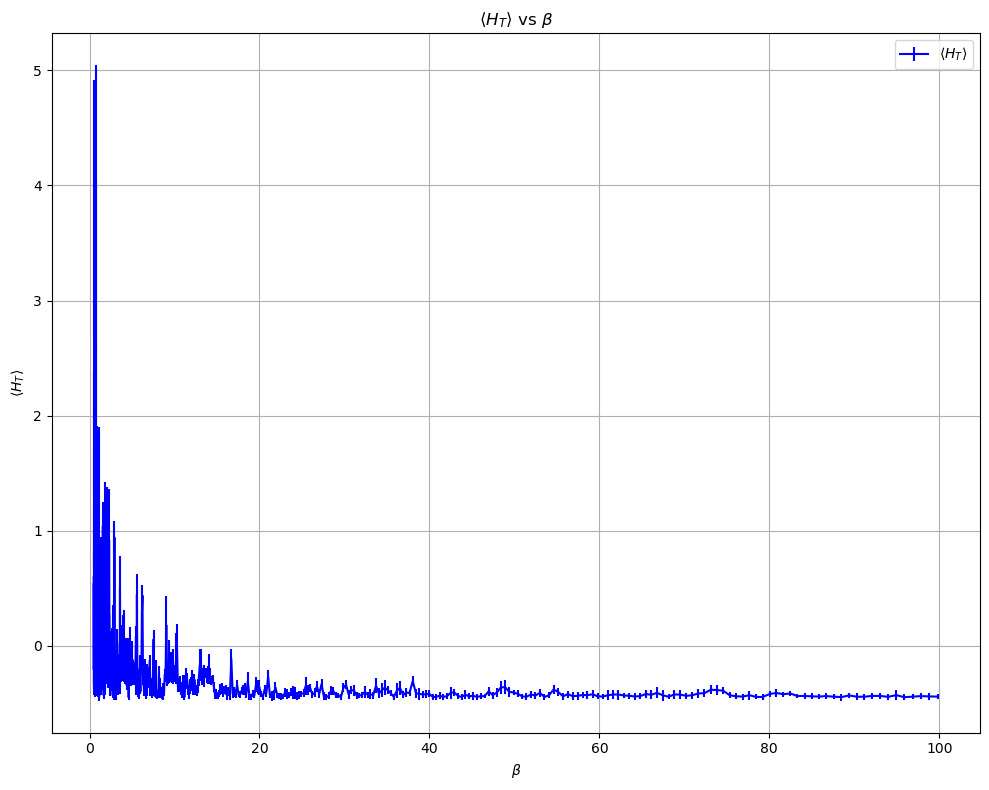

In [61]:
import numpy as np
import matplotlib.pyplot as plt

T, en, err_en = np.loadtxt("08.2/parameters.dat", usecols=(0, 3, 4), skiprows=1, unpack=True)

plt.figure(figsize=(10,8))
plt.errorbar(1/T, en, yerr=err_en*10, label=r"$\langle H_T \rangle$", color='blue')

plt.xlabel(r"$\beta$")
plt.ylabel(r"$\langle H_T \rangle$")
plt.title(r"$\langle H_T \rangle$ vs $\beta$")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

As observed here, with the temperature slowly decreasing ($\beta$ increasing) the algorithm converges to a certain energy value after it explored, at higher temperatures, the various configurations. The statistical uncertainties are here shown with a $10x$ magnification to account their reduced scale.

Once the Simulated Anneling algorithm produced the best parameters I inserted them in the Monte Carlo sampling code for $\langle \hat{H} \rangle_T$ previously implemented to obtain the best expectation value estimation with its statistical error. In the picture below is shown the expecation value as a function of the number of blocks with its statistical error.

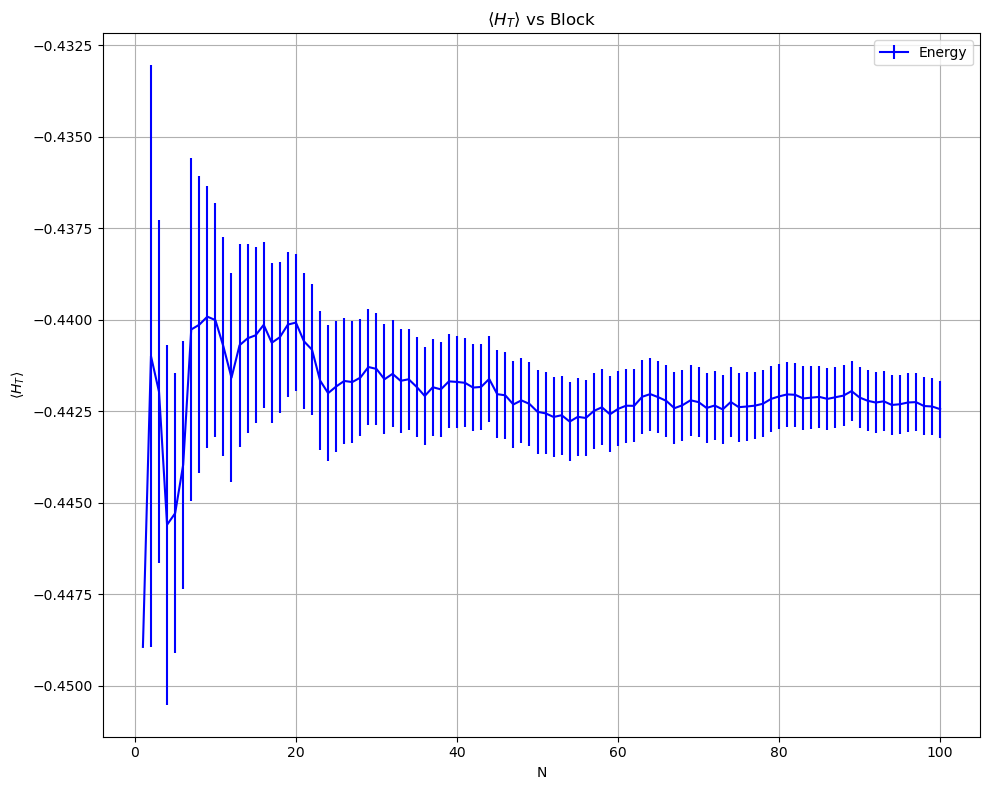

In [19]:
N, en_block, err_en_block = np.loadtxt("08.1/energy.dat", usecols=(0, 2, 3), skiprows=1, unpack=True)

plt.figure(figsize=(10,8))
plt.errorbar(N, en_block, yerr=err_en_block, label='Energy', color='blue')

plt.xlabel("N")
plt.ylabel(r"$\langle H_T \rangle$")
plt.title(r"$\langle H_T \rangle$ vs Block")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

In conclusion, $\langle \hat{H} \rangle_T$ value converges to something that is not exactly the lowest energy, reachable only with an exact solution for the system parameters, but something that is certainly very similar. (Truth is around $-0.46$)

In the next picture i show the evolution in the parameters space as a function of $\beta$, easy to notice that after the system explore various configurations it starts to approach a certain value (target) with ever decreasing diffusion.

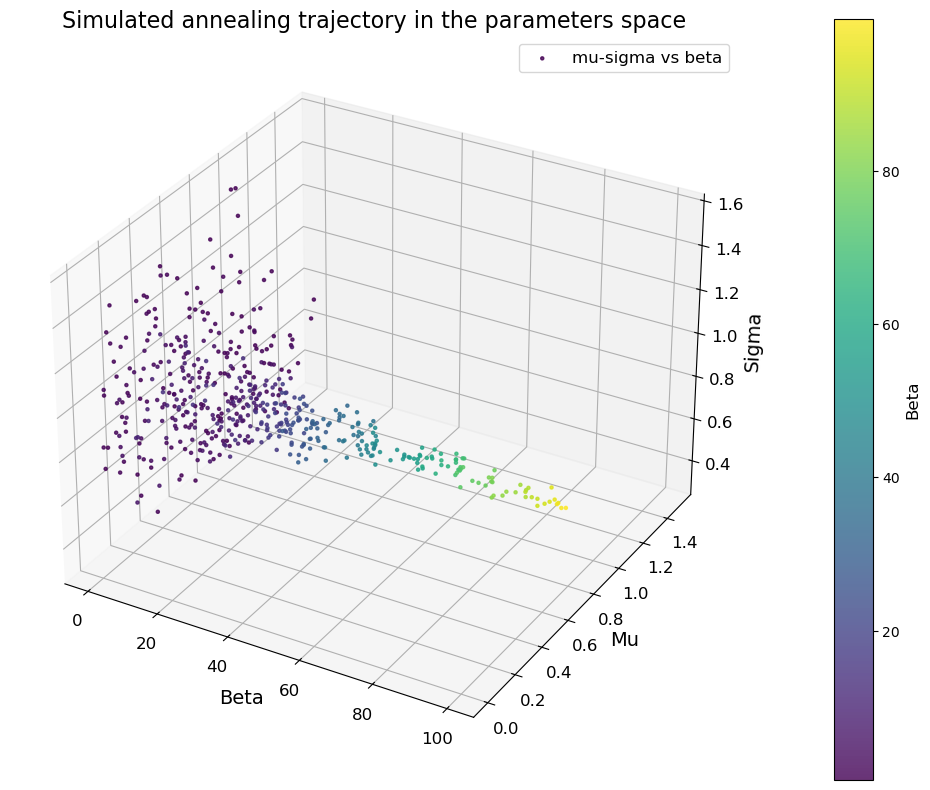

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mu, sigma = np.loadtxt("08.2/parameters.dat", unpack=True, usecols=(1,2), skiprows=1)
beta = 1/T

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D con gradiente di colore in base a beta
sc = ax.scatter(beta, mu, sigma,
                c=beta,              # colore in base a beta
                cmap='viridis',      # colormap (puoi provare anche 'plasma', 'inferno', ecc.)
                marker='.',          # marker leggero
                s=20,                # dimensione marker
                alpha=0.8,           # opacità
                label='mu-sigma vs beta')

# Etichette
ax.set_xlabel('Beta', fontsize=14)
ax.set_ylabel('Mu', fontsize=14)
ax.set_zlabel('Sigma', fontsize=14)
ax.set_title('Simulated annealing trajectory in the parameters space', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)

# Barra del colore
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Beta', fontsize=12)

# Legenda
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

Last i produced a histogram by filling the bins with the sampled configurations and comparing it to both the analytic curve and the solution obtained by the matrix method shown it the Appendix.

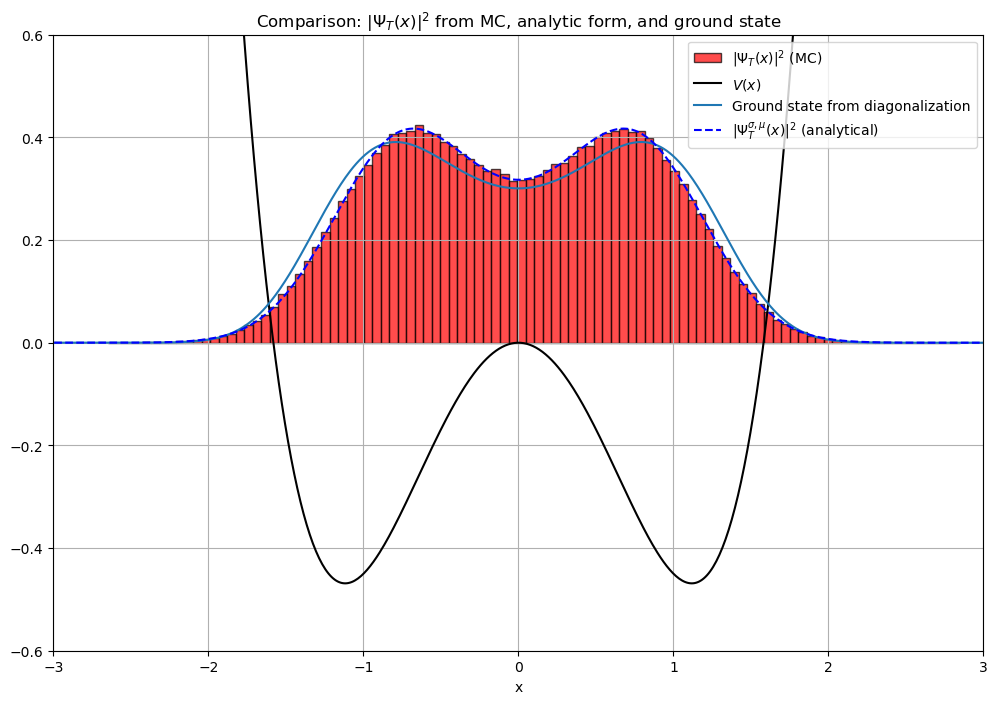

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Load histogram data
x_hist = np.loadtxt("08.1/amplitude.dat", unpack=True, usecols=(0))

# Define potential
def Vpot(x):
    return (x**2 - 2.5)*x**2

# Define trial wavefunction squared (analytical form)
def psi_trial_sq(x, mu, sigma):
    psi = np.exp(-(x - mu)**2 / (2 * sigma**2)) + np.exp(-(x + mu)**2 / (2 * sigma**2))
    return psi**2

# Parameters
hbar = 1
m = 1
a = 10
N = 1000
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0]
V = Vpot(x)

# Central difference matrix
CDiff = np.diag(np.ones(N-1), -1) - 2*np.diag(np.ones(N), 0) + np.diag(np.ones(N-1), 1)

# Hamiltonian
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Diagonalize
E, psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi / np.sqrt(dx)  # Normalize

# Trial wavefunction parameters (update with your optimized values)
mu =  0.772229
sigma = 0.618926
psi_T_sq = psi_trial_sq(x, mu, sigma)
psi_T_sq /= np.trapz(psi_T_sq, x)  # Normalize for fair comparison

# Plotting
plt.figure(figsize=(12, 8))
scale = 0.3

plt.hist(x_hist, bins=100, color='r', edgecolor='black', alpha=0.7, density=True, label=r"$|\Psi_T(x)|^2$ (MC)")
plt.plot(x, scale*V, color="black", label=r"$V(x)$")
plt.plot(x, (psi[0])**2, label="Ground state from diagonalization")
plt.plot(x, psi_T_sq, linestyle='--', color='blue', label=r"$|\Psi_T^{\sigma,\mu}(x)|^2$ (analytical)")

plt.title(r"Comparison: $|\Psi_T(x)|^2$ from MC, analytic form, and ground state")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3, 3))
plt.ylim((-0.6, 0.6))
plt.legend()
plt.show()


## <span style=color:red> Appendix ##


How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.